In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle
import numpy as np

import py21cmfast as p21c
from astropy.cosmology import Planck18
from scipy import interpolate

sys.path.append("..")
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve
import dm21cm.physics as phys

sys.path.append(os.environ['DH_DIR'])
from darkhistory.main import evolve as evolve_DH

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


## DMParam

In [2]:
dm_params = DMParams(
    mode = 'decay',
    primary = 'phot_delta',
    m_DM = 1.2e10,
    lifetime = 1e25,
)

tf_version = 'debug_231002'

## DarkHistory

In [3]:
from darkhistory.config import load_data
load_data('dep_tf', prefix=f'/n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1_{tf_version}')
load_data('ics_tf', prefix=f'/n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1_{tf_version}');

****** Loading transfer functions... ******
Using data at /n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1_debug_231002
    for propagating photons...  

 Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


In [4]:
run_name = 'dhc_phph'

soln = evolve_DH(
    DM_process=dm_params.mode, mDM=dm_params.m_DM,
    primary=dm_params.primary,
    sigmav=dm_params.sigmav, lifetime=dm_params.lifetime,
    struct_boost=dm_params.struct_boost,
    start_rs=3000, end_rs=4.+1, coarsen_factor=12, verbose=1,
    # use fake reionization to get case-A recomb. coeff.
    reion_switch=True, reion_rs=47.,
    xe_reion_func=lambda x: 1e-3 * (1+phys.chi),
    photoion_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    photoheat_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    cross_check_21cmfast=True,
    debug_no_bath=False,
)

pickle.dump(soln, open(f"run_info/{run_name}_dh_soln.p", 'wb'))

Loading time: 0.005 s


  0%|          | 0/534 [00:00<?, ?it/s]WARNING:root:Cross checking 21cmfast!


Initialization time: 0.051 s


/n/home07/yitians/darkhistory/DarkHistory/darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)
  0%|          | 2/534 [00:00<00:58,  9.07it/s]

x_vec_for_f =  [7.00932090e-10 5.68636961e-11 8.11258278e-02]


  1%|          | 3/534 [00:00<01:10,  7.54it/s]

x_vec_for_f =  [8.70335581e-10 7.06066945e-11 8.11258277e-02]


  1%|          | 4/534 [00:00<01:14,  7.13it/s]

x_vec_for_f =  [1.08354425e-09 8.79034246e-11 8.11258277e-02]


  1%|          | 5/534 [00:00<01:16,  6.90it/s]

x_vec_for_f =  [1.35162614e-09 1.09651790e-10 8.11258277e-02]


  1%|          | 6/534 [00:00<01:18,  6.76it/s]

x_vec_for_f =  [1.69080416e-09 1.37167887e-10 8.11258277e-02]


  1%|▏         | 7/534 [00:00<01:18,  6.69it/s]

x_vec_for_f =  [2.12122420e-09 1.72086069e-10 8.11258276e-02]


  1%|▏         | 8/534 [00:01<01:19,  6.66it/s]

x_vec_for_f =  [2.66908784e-09 2.16531961e-10 8.11258276e-02]


  2%|▏         | 9/534 [00:01<01:18,  6.65it/s]

x_vec_for_f =  [3.36843864e-09 2.73267373e-10 8.11258275e-02]


  2%|▏         | 10/534 [00:01<01:19,  6.62it/s]

x_vec_for_f =  [4.26383795e-09 3.45907383e-10 8.11258275e-02]


  2%|▏         | 11/534 [00:01<01:19,  6.60it/s]

x_vec_for_f =  [5.41369538e-09 4.39190519e-10 8.11258274e-02]


  2%|▏         | 12/534 [00:01<01:19,  6.58it/s]

x_vec_for_f =  [6.89468749e-09 5.59337230e-10 8.11258273e-02]


  2%|▏         | 13/534 [00:01<01:20,  6.50it/s]

x_vec_for_f =  [8.80794637e-09 7.14551941e-10 8.11258271e-02]


  3%|▎         | 14/534 [00:02<01:20,  6.48it/s]

x_vec_for_f =  [1.09951520e-08 8.91990809e-10 8.11258269e-02]


  3%|▎         | 15/534 [00:02<01:20,  6.48it/s]

x_vec_for_f =  [1.47107728e-08 1.19342362e-09 8.11258266e-02]


  3%|▎         | 16/534 [00:02<01:19,  6.48it/s]

x_vec_for_f =  [1.89570100e-08 1.53790313e-09 8.11258263e-02]


  3%|▎         | 17/534 [00:02<01:19,  6.50it/s]

x_vec_for_f =  [2.42057210e-08 1.96370915e-09 8.11258259e-02]


  3%|▎         | 18/534 [00:02<01:19,  6.50it/s]

x_vec_for_f =  [3.15759703e-08 2.56162673e-09 8.11258253e-02]


  4%|▎         | 19/534 [00:02<01:19,  6.49it/s]

x_vec_for_f =  [4.10557470e-08 3.33068146e-09 8.11258245e-02]


  4%|▎         | 20/534 [00:02<01:19,  6.50it/s]

x_vec_for_f =  [5.36064184e-08 4.34886507e-09 8.11258235e-02]


  4%|▍         | 21/534 [00:03<01:18,  6.51it/s]

x_vec_for_f =  [7.03656089e-08 5.70846827e-09 8.11258221e-02]


  4%|▍         | 22/534 [00:03<01:18,  6.52it/s]

x_vec_for_f =  [9.25561559e-08 7.50869476e-09 8.11258203e-02]


  4%|▍         | 23/534 [00:03<01:18,  6.51it/s]

x_vec_for_f =  [1.22231242e-07 9.91611072e-09 8.11258179e-02]


  4%|▍         | 24/534 [00:03<01:18,  6.54it/s]

x_vec_for_f =  [1.61895873e-07 1.31339367e-08 8.11258147e-02]


  5%|▍         | 25/534 [00:03<01:17,  6.54it/s]

x_vec_for_f =  [2.15163213e-07 1.74552938e-08 8.11258104e-02]


  5%|▍         | 26/534 [00:03<01:17,  6.54it/s]

x_vec_for_f =  [2.87054784e-07 2.32875570e-08 8.11258045e-02]


  5%|▌         | 27/534 [00:04<01:17,  6.56it/s]

x_vec_for_f =  [3.84461782e-07 3.11897803e-08 8.11257966e-02]


  5%|▌         | 28/534 [00:04<01:17,  6.54it/s]

x_vec_for_f =  [5.16928501e-07 4.19362526e-08 8.11257859e-02]


  5%|▌         | 29/534 [00:04<01:17,  6.55it/s]

x_vec_for_f =  [6.97797623e-07 5.66094098e-08 8.11257712e-02]


  6%|▌         | 30/534 [00:04<01:17,  6.53it/s]

x_vec_for_f =  [9.45729060e-07 7.67230529e-08 8.11257511e-02]


  6%|▌         | 31/534 [00:04<01:17,  6.50it/s]

x_vec_for_f =  [1.28686759e-06 1.04398199e-07 8.11257234e-02]


  6%|▌         | 32/534 [00:04<01:17,  6.46it/s]

x_vec_for_f =  [1.75800705e-06 1.42619777e-07 8.11256852e-02]


  6%|▌         | 33/534 [00:04<01:17,  6.47it/s]

x_vec_for_f =  [2.41150956e-06 1.95635709e-07 8.11256322e-02]


  6%|▋         | 34/534 [00:05<01:19,  6.31it/s]

x_vec_for_f =  [3.32516671e-06 2.69756902e-07 8.11255581e-02]


  7%|▋         | 35/534 [00:05<01:20,  6.17it/s]

x_vec_for_f =  [4.59732984e-06 3.72962189e-07 8.11254549e-02]


  7%|▋         | 36/534 [00:05<01:19,  6.25it/s]

x_vec_for_f =  [6.38004604e-06 5.17586516e-07 8.11253102e-02]


  7%|▋         | 37/534 [00:05<01:18,  6.31it/s]

x_vec_for_f =  [8.89747945e-06 7.21815386e-07 8.11251060e-02]


  7%|▋         | 38/534 [00:05<01:17,  6.38it/s]

x_vec_for_f =  [1.24540363e-05 1.01034400e-06 8.11248175e-02]


  7%|▋         | 39/534 [00:05<01:18,  6.34it/s]

x_vec_for_f =  [1.75202308e-05 1.42134322e-06 8.11244065e-02]


  7%|▋         | 40/534 [00:06<01:17,  6.37it/s]

x_vec_for_f =  [2.47372733e-05 2.00683177e-06 8.11238210e-02]


  8%|▊         | 41/534 [00:06<01:17,  6.38it/s]

x_vec_for_f =  [3.51098490e-05 2.84831556e-06 8.11229795e-02]


  8%|▊         | 42/534 [00:06<01:16,  6.42it/s]

x_vec_for_f =  [5.00117457e-05 4.05724427e-06 8.11217706e-02]


  8%|▊         | 43/534 [00:06<01:16,  6.44it/s]

x_vec_for_f =  [7.16260498e-05 5.81072258e-06 8.11200171e-02]


  8%|▊         | 44/534 [00:06<01:16,  6.43it/s]

x_vec_for_f =  [1.02947471e-04 8.35169881e-06 8.11174761e-02]


  8%|▊         | 45/534 [00:06<01:15,  6.47it/s]

x_vec_for_f =  [1.48655926e-04 1.20598351e-05 8.11137680e-02]


  9%|▊         | 46/534 [00:07<01:15,  6.50it/s]

x_vec_for_f =  [2.15676503e-04 1.74969349e-05 8.11083309e-02]


  9%|▉         | 47/534 [00:07<01:14,  6.50it/s]

x_vec_for_f =  [3.14393161e-04 2.55054055e-05 8.11003224e-02]


  9%|▉         | 48/534 [00:07<01:14,  6.50it/s]

x_vec_for_f =  [4.60474731e-04 3.73563937e-05 8.10884714e-02]


  9%|▉         | 49/534 [00:07<01:15,  6.46it/s]

x_vec_for_f =  [6.77626768e-04 5.49730325e-05 8.10708548e-02]


  9%|▉         | 50/534 [00:07<01:14,  6.46it/s]

x_vec_for_f =  [1.00188110e-03 8.12784339e-05 8.10445494e-02]


 10%|▉         | 51/534 [00:07<01:14,  6.47it/s]

x_vec_for_f =  [0.00148818 0.00012073 0.0810051 ]


 10%|▉         | 52/534 [00:07<01:14,  6.49it/s]

x_vec_for_f =  [0.00222056 0.00018014 0.08094568]


 10%|▉         | 53/534 [00:08<01:13,  6.51it/s]

x_vec_for_f =  [0.0033277  0.00026996 0.08085587]


 10%|█         | 54/534 [00:08<01:14,  6.44it/s]

x_vec_for_f =  [0.00500674 0.00040618 0.08071965]


 10%|█         | 55/534 [00:08<01:15,  6.31it/s]

x_vec_for_f =  [0.0075588  0.00061321 0.08051261]


 10%|█         | 56/534 [00:08<01:16,  6.26it/s]

x_vec_for_f =  [0.0112445  0.00091222 0.08021361]


 11%|█         | 57/534 [00:08<01:16,  6.22it/s]

x_vec_for_f =  [0.01678243 0.00136149 0.07976434]


 11%|█         | 58/534 [00:08<01:16,  6.21it/s]

x_vec_for_f =  [0.02476616 0.00200918 0.07911665]


 11%|█         | 59/534 [00:09<01:16,  6.21it/s]

x_vec_for_f =  [0.03587595 0.00291047 0.07821536]


 11%|█         | 60/534 [00:09<01:16,  6.21it/s]

x_vec_for_f =  [0.05070322 0.00411334 0.07701249]


 11%|█▏        | 61/534 [00:09<01:15,  6.22it/s]

x_vec_for_f =  [0.06961129 0.00564727 0.07547855]


 12%|█▏        | 62/534 [00:09<01:16,  6.21it/s]

x_vec_for_f =  [0.09269056 0.0075196  0.07360623]


 12%|█▏        | 63/534 [00:09<01:16,  6.18it/s]

x_vec_for_f =  [0.11977102 0.00971652 0.0714093 ]


 12%|█▏        | 64/534 [00:09<01:16,  6.17it/s]

x_vec_for_f =  [0.15048008 0.01220782 0.06891801]


 12%|█▏        | 65/534 [00:10<01:15,  6.17it/s]

x_vec_for_f =  [0.18431039 0.01495233 0.06617349]


 12%|█▏        | 66/534 [00:10<01:15,  6.17it/s]

x_vec_for_f =  [0.2206851  0.01790326 0.06322257]


 13%|█▎        | 67/534 [00:10<01:15,  6.20it/s]

x_vec_for_f =  [0.25900323 0.02101185 0.06011398]


 13%|█▎        | 68/534 [00:10<01:15,  6.21it/s]

x_vec_for_f =  [0.29867705 0.02423042 0.0568954 ]


 13%|█▎        | 69/534 [00:10<01:17,  6.01it/s]

x_vec_for_f =  [0.3391573  0.02751442 0.05361141]


 13%|█▎        | 70/534 [00:10<01:17,  5.95it/s]

x_vec_for_f =  [0.37994831 0.03082362 0.05030221]


 13%|█▎        | 71/534 [00:11<01:16,  6.02it/s]

x_vec_for_f =  [0.42061486 0.03412273 0.0470031 ]


 13%|█▎        | 72/534 [00:11<01:16,  6.07it/s]

x_vec_for_f =  [0.46077752 0.03738096 0.04374487]


 14%|█▎        | 73/534 [00:11<01:15,  6.12it/s]

x_vec_for_f =  [0.50012925 0.0405734  0.04055243]


 14%|█▍        | 74/534 [00:11<01:14,  6.16it/s]

x_vec_for_f =  [0.53840668 0.04367869 0.03744714]


 14%|█▍        | 75/534 [00:11<01:14,  6.18it/s]

x_vec_for_f =  [0.57539377 0.0466793  0.03444653]


 14%|█▍        | 76/534 [00:11<01:13,  6.20it/s]

x_vec_for_f =  [0.61091528 0.04956101 0.03156482]


 14%|█▍        | 77/534 [00:12<01:13,  6.21it/s]

x_vec_for_f =  [0.64483815 0.05231303 0.0288128 ]


 15%|█▍        | 78/534 [00:12<01:13,  6.21it/s]

x_vec_for_f =  [0.67704609 0.05492592 0.0261999 ]


 15%|█▍        | 79/534 [00:12<01:13,  6.22it/s]

x_vec_for_f =  [0.70746494 0.05739368 0.02373215]


 15%|█▍        | 80/534 [00:12<01:12,  6.23it/s]

x_vec_for_f =  [0.73602717 0.05971081 0.02141501]


 15%|█▌        | 81/534 [00:12<01:12,  6.23it/s]

x_vec_for_f =  [0.76271392 0.0618758  0.01925003]


 15%|█▌        | 82/534 [00:12<01:12,  6.24it/s]

x_vec_for_f =  [0.78751667 0.06388794 0.01723789]


 16%|█▌        | 83/534 [00:12<01:12,  6.25it/s]

x_vec_for_f =  [0.81044721 0.0657482  0.01537763]


 16%|█▌        | 84/534 [00:13<01:12,  6.24it/s]

x_vec_for_f =  [0.83153574 0.06745903 0.0136668 ]


 16%|█▌        | 85/534 [00:13<01:11,  6.25it/s]

x_vec_for_f =  [0.85082884 0.06902419 0.01210163]


 16%|█▌        | 86/534 [00:13<01:11,  6.24it/s]

x_vec_for_f =  [0.86838851 0.07044874 0.01067709]


 16%|█▋        | 87/534 [00:13<01:11,  6.23it/s]

x_vec_for_f =  [0.88428832 0.07173862 0.00938721]


 16%|█▋        | 88/534 [00:13<01:11,  6.24it/s]

x_vec_for_f =  [0.89861248 0.07290068 0.00822515]


 17%|█▋        | 89/534 [00:13<01:11,  6.23it/s]

x_vec_for_f =  [0.9114519  0.07394229 0.00718354]


 17%|█▋        | 90/534 [00:14<01:11,  6.23it/s]

x_vec_for_f =  [0.92290556 0.07487148 0.00625435]


 17%|█▋        | 91/534 [00:14<01:11,  6.23it/s]

x_vec_for_f =  [0.93307414 0.07569641 0.00542942]


 17%|█▋        | 92/534 [00:14<01:10,  6.24it/s]

x_vec_for_f =  [0.94205973 0.07642538 0.00470045]


 17%|█▋        | 93/534 [00:14<01:11,  6.20it/s]

x_vec_for_f =  [0.94996388 0.07706661 0.00405922]


 18%|█▊        | 94/534 [00:14<01:11,  6.19it/s]

x_vec_for_f =  [0.95688609 0.07762818 0.00349765]


 18%|█▊        | 95/534 [00:14<01:10,  6.21it/s]

x_vec_for_f =  [0.96292313 0.07811794 0.00300789]


 18%|█▊        | 96/534 [00:15<01:10,  6.20it/s]

x_vec_for_f =  [0.96816677 0.07854333 0.0025825 ]


 18%|█▊        | 97/534 [00:15<01:10,  6.22it/s]

x_vec_for_f =  [0.97270309 0.07891134 0.00221448]


 18%|█▊        | 98/534 [00:15<01:09,  6.24it/s]

x_vec_for_f =  [0.97661179 0.07922844 0.00189739]


 19%|█▊        | 99/534 [00:15<01:09,  6.25it/s]

x_vec_for_f =  [0.97996867 0.07950077 0.00162506]


 19%|█▊        | 100/534 [00:15<01:09,  6.24it/s]

x_vec_for_f =  [0.98283824 0.07973357 0.00139226]


 19%|█▉        | 101/534 [00:15<01:09,  6.23it/s]

x_vec_for_f =  [0.98528473 0.07993204 0.00119379]


 19%|█▉        | 102/534 [00:16<01:09,  6.22it/s]

x_vec_for_f =  [0.98736282 0.08010063 0.0010252 ]


 19%|█▉        | 103/534 [00:16<01:11,  6.02it/s]

x_vec_for_f =  [9.89124932e-01 8.02435789e-02 8.82248882e-04]


 19%|█▉        | 104/534 [00:16<01:11,  5.99it/s]

x_vec_for_f =  [9.90614503e-01 8.03644216e-02 7.61406183e-04]


 20%|█▉        | 105/534 [00:16<01:11,  5.97it/s]

x_vec_for_f =  [9.91871304e-01 8.04663806e-02 6.59447182e-04]


 20%|█▉        | 106/534 [00:16<01:11,  6.02it/s]

x_vec_for_f =  [9.92930205e-01 8.05522848e-02 5.73543010e-04]


 20%|██        | 107/534 [00:16<01:10,  6.08it/s]

x_vec_for_f =  [9.93821295e-01 8.06245752e-02 5.01252565e-04]


 20%|██        | 108/534 [00:17<01:09,  6.13it/s]

x_vec_for_f =  [9.94570890e-01 8.06853868e-02 4.40441003e-04]


 20%|██        | 109/534 [00:17<01:08,  6.18it/s]

x_vec_for_f =  [9.95201782e-01 8.07365684e-02 3.89259416e-04]


 21%|██        | 110/534 [00:17<01:08,  6.20it/s]

x_vec_for_f =  [9.95733367e-01 8.07796937e-02 3.46134134e-04]


 21%|██        | 111/534 [00:17<01:08,  6.21it/s]

x_vec_for_f =  [9.96182260e-01 8.08161105e-02 3.09717312e-04]


 21%|██        | 112/534 [00:17<01:07,  6.24it/s]

x_vec_for_f =  [9.96562399e-01 8.08469496e-02 2.78878204e-04]


 21%|██        | 113/534 [00:17<01:07,  6.27it/s]

x_vec_for_f =  [9.96885448e-01 8.08731572e-02 2.52670593e-04]


 21%|██▏       | 114/534 [00:17<01:06,  6.29it/s]

x_vec_for_f =  [9.97161111e-01 8.08955206e-02 2.30307203e-04]


 22%|██▏       | 115/534 [00:18<01:06,  6.30it/s]

x_vec_for_f =  [9.97397427e-01 8.09146919e-02 2.11135922e-04]


 22%|██▏       | 116/534 [00:18<01:06,  6.32it/s]

x_vec_for_f =  [9.97601021e-01 8.09312086e-02 1.94619169e-04]


 22%|██▏       | 117/534 [00:18<01:05,  6.32it/s]

x_vec_for_f =  [9.97777255e-01 8.09455058e-02 1.80322055e-04]


 22%|██▏       | 118/534 [00:18<01:05,  6.34it/s]

x_vec_for_f =  [9.97930702e-01 8.09579543e-02 1.67873495e-04]


 22%|██▏       | 119/534 [00:18<01:05,  6.36it/s]

x_vec_for_f =  [9.98065030e-01 8.09688518e-02 1.56976018e-04]


 22%|██▏       | 120/534 [00:18<01:04,  6.39it/s]

x_vec_for_f =  [9.98183179e-01 8.09784367e-02 1.47391130e-04]


 23%|██▎       | 121/534 [00:19<01:04,  6.38it/s]

x_vec_for_f =  [9.98287842e-01 8.09869275e-02 1.38900266e-04]


 23%|██▎       | 122/534 [00:19<01:04,  6.40it/s]

x_vec_for_f =  [9.98380664e-01 8.09944578e-02 1.31369979e-04]


 23%|██▎       | 123/534 [00:19<01:04,  6.41it/s]

x_vec_for_f =  [9.98463615e-01 8.10011873e-02 1.24640501e-04]


 23%|██▎       | 124/534 [00:19<01:03,  6.41it/s]

x_vec_for_f =  [9.98538279e-01 8.10072445e-02 1.18583313e-04]


 23%|██▎       | 125/534 [00:19<01:03,  6.41it/s]

x_vec_for_f =  [9.98605426e-01 8.10126918e-02 1.13135979e-04]


 24%|██▎       | 126/534 [00:19<01:04,  6.35it/s]

x_vec_for_f =  [9.98666382e-01 8.10176370e-02 1.08190861e-04]


 24%|██▍       | 127/534 [00:20<01:03,  6.38it/s]

x_vec_for_f =  [9.98721786e-01 8.10221316e-02 1.03696178e-04]


 24%|██▍       | 128/534 [00:20<01:03,  6.37it/s]

x_vec_for_f =  [9.98772332e-01 8.10262322e-02 9.95956130e-05]


 24%|██▍       | 129/534 [00:20<01:03,  6.37it/s]

x_vec_for_f =  [9.98818606e-01 8.10299863e-02 9.58415306e-05]


 24%|██▍       | 130/534 [00:20<01:03,  6.37it/s]

x_vec_for_f =  [9.98861110e-01 8.10334344e-02 9.23933664e-05]


 25%|██▍       | 131/534 [00:20<01:03,  6.35it/s]

x_vec_for_f =  [9.98900271e-01 8.10366114e-02 8.92164433e-05]


 25%|██▍       | 132/534 [00:20<01:03,  6.34it/s]

x_vec_for_f =  [9.98936455e-01 8.10395468e-02 8.62809774e-05]


 25%|██▍       | 133/534 [00:20<01:03,  6.35it/s]

x_vec_for_f =  [9.98969979e-01 8.10422665e-02 8.35612747e-05]


 25%|██▌       | 134/534 [00:21<01:02,  6.37it/s]

x_vec_for_f =  [9.99001119e-01 8.10447927e-02 8.10350752e-05]


 25%|██▌       | 135/534 [00:21<01:02,  6.37it/s]

x_vec_for_f =  [9.99030111e-01 8.10471448e-02 7.86830302e-05]


 25%|██▌       | 136/534 [00:21<01:02,  6.41it/s]

x_vec_for_f =  [9.99057164e-01 8.10493394e-02 7.64883772e-05]


 26%|██▌       | 137/534 [00:21<01:03,  6.21it/s]

x_vec_for_f =  [9.99082459e-01 8.10513915e-02 7.44362968e-05]


 26%|██▌       | 138/534 [00:21<01:04,  6.10it/s]

x_vec_for_f =  [9.99106157e-01 8.10533141e-02 7.25137401e-05]


 26%|██▌       | 139/534 [00:21<01:03,  6.18it/s]

x_vec_for_f =  [9.99128401e-01 8.10551186e-02 7.07091838e-05]


 26%|██▌       | 140/534 [00:22<01:03,  6.24it/s]

x_vec_for_f =  [9.99149316e-01 8.10568154e-02 6.90124168e-05]


 26%|██▋       | 141/534 [00:22<01:02,  6.30it/s]

x_vec_for_f =  [9.99169015e-01 8.10584135e-02 6.74143603e-05]


 27%|██▋       | 142/534 [00:22<01:01,  6.35it/s]

x_vec_for_f =  [9.99187596e-01 8.10599209e-02 6.59069169e-05]


 27%|██▋       | 143/534 [00:22<01:01,  6.35it/s]

x_vec_for_f =  [9.99205150e-01 8.10613450e-02 6.44828425e-05]


 27%|██▋       | 144/534 [00:22<01:01,  6.34it/s]

x_vec_for_f =  [9.99221757e-01 8.10626922e-02 6.31356362e-05]


 27%|██▋       | 145/534 [00:22<01:01,  6.32it/s]

x_vec_for_f =  [9.99237488e-01 8.10639684e-02 6.18594486e-05]


 27%|██▋       | 146/534 [00:23<01:01,  6.33it/s]

x_vec_for_f =  [9.99252408e-01 8.10651788e-02 6.06490129e-05]


 28%|██▊       | 147/534 [00:23<01:01,  6.34it/s]

x_vec_for_f =  [9.99266575e-01 8.10663281e-02 5.94997150e-05]


 28%|██▊       | 148/534 [00:23<01:00,  6.36it/s]

x_vec_for_f =  [9.99280041e-01 8.10674206e-02 5.84072361e-05]


 28%|██▊       | 149/534 [00:23<01:00,  6.37it/s]

x_vec_for_f =  [9.99292856e-01 8.10684602e-02 5.73676434e-05]


 28%|██▊       | 150/534 [00:23<01:00,  6.37it/s]

x_vec_for_f =  [9.99305063e-01 8.10694505e-02 5.63773538e-05]


 28%|██▊       | 151/534 [00:23<01:00,  6.36it/s]

x_vec_for_f =  [9.99316609e-01 8.10703871e-02 5.54406672e-05]


 28%|██▊       | 152/534 [00:23<01:00,  6.34it/s]

x_vec_for_f =  [9.99327721e-01 8.10712887e-02 5.45391514e-05]


 29%|██▊       | 153/534 [00:24<00:59,  6.37it/s]

x_vec_for_f =  [9.99338254e-01 8.10721431e-02 5.36847024e-05]


 29%|██▉       | 154/534 [00:24<00:59,  6.37it/s]

x_vec_for_f =  [9.99348328e-01 8.10729604e-02 5.28674366e-05]


 29%|██▉       | 155/534 [00:24<00:59,  6.36it/s]

x_vec_for_f =  [9.99357971e-01 8.10737427e-02 5.20850993e-05]


 29%|██▉       | 156/534 [00:24<00:59,  6.38it/s]

x_vec_for_f =  [9.99367210e-01 8.10744922e-02 5.13356083e-05]


 29%|██▉       | 157/534 [00:24<00:59,  6.37it/s]

x_vec_for_f =  [9.99376067e-01 8.10752108e-02 5.06170430e-05]


 30%|██▉       | 158/534 [00:24<00:59,  6.36it/s]

x_vec_for_f =  [9.99384564e-01 8.10759000e-02 4.99277737e-05]


 30%|██▉       | 159/534 [00:25<00:58,  6.37it/s]

x_vec_for_f =  [9.99392698e-01 8.10765600e-02 4.92678456e-05]


 30%|██▉       | 160/534 [00:25<00:58,  6.40it/s]

x_vec_for_f =  [9.99400513e-01 8.10771939e-02 4.86339172e-05]


 30%|███       | 161/534 [00:25<00:58,  6.40it/s]

x_vec_for_f =  [9.99408023e-01 8.10778032e-02 4.80246036e-05]


 30%|███       | 162/534 [00:25<00:57,  6.41it/s]

x_vec_for_f =  [9.99415247e-01 8.10783892e-02 4.74385826e-05]


 31%|███       | 163/534 [00:25<00:57,  6.42it/s]

x_vec_for_f =  [9.99422199e-01 8.10789532e-02 4.68746216e-05]


 31%|███       | 164/534 [00:25<00:57,  6.42it/s]

x_vec_for_f =  [9.99428892e-01 8.10794962e-02 4.63315695e-05]


 31%|███       | 165/534 [00:25<00:57,  6.41it/s]

x_vec_for_f =  [9.99435342e-01 8.10800195e-02 4.58083500e-05]


 31%|███       | 166/534 [00:26<00:57,  6.42it/s]

x_vec_for_f =  [9.99441559e-01 8.10805239e-02 4.53039550e-05]


 31%|███▏      | 167/534 [00:26<00:56,  6.44it/s]

x_vec_for_f =  [9.99447556e-01 8.10810104e-02 4.48174391e-05]


 31%|███▏      | 168/534 [00:26<00:56,  6.46it/s]

x_vec_for_f =  [9.99453344e-01 8.10814799e-02 4.43479149e-05]


 32%|███▏      | 169/534 [00:26<00:56,  6.45it/s]

x_vec_for_f =  [9.99458930e-01 8.10819331e-02 4.38947410e-05]


 32%|███▏      | 170/534 [00:26<00:56,  6.44it/s]

x_vec_for_f =  [9.99464324e-01 8.10823707e-02 4.34571466e-05]


 32%|███▏      | 171/534 [00:26<00:56,  6.41it/s]

x_vec_for_f =  [9.99469535e-01 8.10827934e-02 4.30343968e-05]


 32%|███▏      | 172/534 [00:27<00:58,  6.18it/s]

x_vec_for_f =  [9.99474572e-01 8.10832020e-02 4.26257986e-05]


 32%|███▏      | 173/534 [00:27<00:58,  6.12it/s]

x_vec_for_f =  [9.99479442e-01 8.10835971e-02 4.22306979e-05]


 33%|███▎      | 174/534 [00:27<00:58,  6.19it/s]

x_vec_for_f =  [9.99484153e-01 8.10839793e-02 4.18484768e-05]


 33%|███▎      | 175/534 [00:27<00:57,  6.24it/s]

x_vec_for_f =  [9.99488713e-01 8.10843493e-02 4.14785510e-05]


 33%|███▎      | 176/534 [00:27<00:57,  6.27it/s]

x_vec_for_f =  [9.99493129e-01 8.10847074e-02 4.11203675e-05]


 33%|███▎      | 177/534 [00:27<00:56,  6.29it/s]

x_vec_for_f =  [9.99497405e-01 8.10850544e-02 4.07734018e-05]


 33%|███▎      | 178/534 [00:28<00:56,  6.33it/s]

x_vec_for_f =  [9.99501550e-01 8.10853907e-02 4.04371567e-05]


 34%|███▎      | 179/534 [00:28<00:55,  6.37it/s]

x_vec_for_f =  [9.99505569e-01 8.10857167e-02 4.01111545e-05]


 34%|███▎      | 180/534 [00:28<00:55,  6.41it/s]

x_vec_for_f =  [9.99509464e-01 8.10860327e-02 3.97951273e-05]


 34%|███▍      | 181/534 [00:28<00:55,  6.41it/s]

x_vec_for_f =  [9.99513242e-01 8.10863391e-02 3.94886721e-05]


 34%|███▍      | 182/534 [00:28<00:54,  6.40it/s]

x_vec_for_f =  [9.99516906e-01 8.10866364e-02 3.91913888e-05]


 34%|███▍      | 183/534 [00:28<00:54,  6.39it/s]

x_vec_for_f =  [9.99520462e-01 8.10869249e-02 3.89028957e-05]


 34%|███▍      | 184/534 [00:28<00:54,  6.40it/s]

x_vec_for_f =  [9.99523915e-01 8.10872050e-02 3.86228292e-05]


 35%|███▍      | 185/534 [00:29<00:54,  6.41it/s]

x_vec_for_f =  [9.99527267e-01 8.10874770e-02 3.83508425e-05]


 35%|███▍      | 186/534 [00:29<00:54,  6.39it/s]

x_vec_for_f =  [9.99530524e-01 8.10877412e-02 3.80866044e-05]


 35%|███▌      | 187/534 [00:29<00:54,  6.40it/s]

x_vec_for_f =  [9.99533690e-01 8.10879980e-02 3.78297984e-05]


 35%|███▌      | 188/534 [00:29<00:54,  6.40it/s]

x_vec_for_f =  [9.99536767e-01 8.10882477e-02 3.75801217e-05]


 35%|███▌      | 189/534 [00:29<00:53,  6.41it/s]

x_vec_for_f =  [9.99539761e-01 8.10884905e-02 3.73372846e-05]


 36%|███▌      | 190/534 [00:29<00:53,  6.43it/s]

x_vec_for_f =  [9.99542673e-01 8.10887268e-02 3.71010094e-05]


 36%|███▌      | 191/534 [00:30<00:53,  6.40it/s]

x_vec_for_f =  [9.99545506e-01 8.10889566e-02 3.68712176e-05]


 36%|███▌      | 192/534 [00:30<00:53,  6.40it/s]

x_vec_for_f =  [9.99548261e-01 8.10891801e-02 3.66476813e-05]


 36%|███▌      | 193/534 [00:30<00:53,  6.41it/s]

x_vec_for_f =  [9.99550943e-01 8.10893977e-02 3.64301613e-05]


 36%|███▋      | 194/534 [00:30<00:53,  6.39it/s]

x_vec_for_f =  [9.99553552e-01 8.10896094e-02 3.62184273e-05]


 37%|███▋      | 195/534 [00:30<00:52,  6.40it/s]

x_vec_for_f =  [9.99556094e-01 8.10898156e-02 3.60122580e-05]


 37%|███▋      | 196/534 [00:30<00:52,  6.41it/s]

x_vec_for_f =  [9.99558569e-01 8.10900164e-02 3.58114406e-05]


 37%|███▋      | 197/534 [00:31<00:52,  6.42it/s]

x_vec_for_f =  [9.99560981e-01 8.10902120e-02 3.56157705e-05]


 37%|███▋      | 198/534 [00:31<00:52,  6.40it/s]

x_vec_for_f =  [9.99563332e-01 8.10904028e-02 3.54250506e-05]


 37%|███▋      | 199/534 [00:31<00:52,  6.41it/s]

x_vec_for_f =  [9.99565624e-01 8.10905887e-02 3.52390910e-05]


 37%|███▋      | 200/534 [00:31<00:52,  6.42it/s]

x_vec_for_f =  [9.99567860e-01 8.10907701e-02 3.50577082e-05]


 38%|███▊      | 201/534 [00:31<00:52,  6.38it/s]

x_vec_for_f =  [9.99570042e-01 8.10909471e-02 3.48807256e-05]


 38%|███▊      | 202/534 [00:31<00:51,  6.41it/s]

x_vec_for_f =  [9.99572169e-01 8.10911197e-02 3.47081532e-05]


 38%|███▊      | 203/534 [00:31<00:51,  6.42it/s]

x_vec_for_f =  [9.99574243e-01 8.10912880e-02 3.45398595e-05]


 38%|███▊      | 204/534 [00:32<00:51,  6.40it/s]

x_vec_for_f =  [9.99576267e-01 8.10914521e-02 3.43756911e-05]


 38%|███▊      | 205/534 [00:32<00:51,  6.41it/s]

x_vec_for_f =  [9.99578242e-01 8.10916123e-02 3.42154988e-05]


 39%|███▊      | 206/534 [00:32<00:51,  6.38it/s]

x_vec_for_f =  [9.99580169e-01 8.10917687e-02 3.40591386e-05]


 39%|███▉      | 207/534 [00:32<00:53,  6.16it/s]

x_vec_for_f =  [9.99582051e-01 8.10919213e-02 3.39064708e-05]


 39%|███▉      | 208/534 [00:32<00:52,  6.16it/s]

x_vec_for_f =  [9.99583889e-01 8.10920705e-02 3.37573604e-05]


 39%|███▉      | 209/534 [00:32<00:52,  6.24it/s]

x_vec_for_f =  [9.99585685e-01 8.10922161e-02 3.36116762e-05]


 39%|███▉      | 210/534 [00:33<00:51,  6.29it/s]

x_vec_for_f =  [9.99587440e-01 8.10923585e-02 3.34692913e-05]


 40%|███▉      | 211/534 [00:33<00:50,  6.37it/s]

x_vec_for_f =  [9.99589156e-01 8.10924977e-02 3.33300821e-05]


 40%|███▉      | 212/534 [00:33<00:50,  6.43it/s]

x_vec_for_f =  [9.99590834e-01 8.10926339e-02 3.31939288e-05]


 40%|███▉      | 213/534 [00:33<00:49,  6.45it/s]

x_vec_for_f =  [9.99592474e-01 8.10927669e-02 3.30608882e-05]


 40%|████      | 214/534 [00:33<00:49,  6.46it/s]

x_vec_for_f =  [9.99594076e-01 8.10928969e-02 3.29308851e-05]


 40%|████      | 215/534 [00:33<00:49,  6.48it/s]

x_vec_for_f =  [9.99595643e-01 8.10930240e-02 3.28038157e-05]


 40%|████      | 216/534 [00:34<00:49,  6.47it/s]

x_vec_for_f =  [9.99597174e-01 8.10931482e-02 3.26795776e-05]


 41%|████      | 217/534 [00:34<00:48,  6.48it/s]

x_vec_for_f =  [9.99598672e-01 8.10932697e-02 3.25580719e-05]


 41%|████      | 218/534 [00:34<00:48,  6.50it/s]

x_vec_for_f =  [9.99600137e-01 8.10933886e-02 3.24392017e-05]


 41%|████      | 219/534 [00:34<00:48,  6.53it/s]

x_vec_for_f =  [9.99601571e-01 8.10935049e-02 3.23228731e-05]


 41%|████      | 220/534 [00:34<00:48,  6.51it/s]

x_vec_for_f =  [9.99602975e-01 8.10936188e-02 3.22089944e-05]


 41%|████▏     | 221/534 [00:34<00:48,  6.50it/s]

x_vec_for_f =  [9.99604349e-01 8.10937303e-02 3.20974759e-05]


 42%|████▏     | 222/534 [00:34<00:48,  6.49it/s]

x_vec_for_f =  [9.99605696e-01 8.10938396e-02 3.19882302e-05]


 42%|████▏     | 223/534 [00:35<00:47,  6.50it/s]

x_vec_for_f =  [9.99607016e-01 8.10939466e-02 3.18811718e-05]


 42%|████▏     | 224/534 [00:35<00:47,  6.47it/s]

x_vec_for_f =  [9.99608307e-01 8.10940514e-02 3.17763794e-05]


 42%|████▏     | 225/534 [00:35<00:47,  6.48it/s]

x_vec_for_f =  [9.99609572e-01 8.10941540e-02 3.16738151e-05]


 42%|████▏     | 226/534 [00:35<00:47,  6.49it/s]

x_vec_for_f =  [9.99610809e-01 8.10942544e-02 3.15734054e-05]


 43%|████▎     | 227/534 [00:35<00:47,  6.49it/s]

x_vec_for_f =  [9.99612021e-01 8.10943527e-02 3.14750771e-05]


 43%|████▎     | 228/534 [00:35<00:46,  6.51it/s]

x_vec_for_f =  [9.99613209e-01 8.10944491e-02 3.13787587e-05]


 43%|████▎     | 229/534 [00:35<00:46,  6.51it/s]

x_vec_for_f =  [9.99614372e-01 8.10945434e-02 3.12843803e-05]


 43%|████▎     | 230/534 [00:36<00:46,  6.50it/s]

x_vec_for_f =  [9.99615512e-01 8.10946359e-02 3.11918735e-05]


 43%|████▎     | 231/534 [00:36<00:46,  6.48it/s]

x_vec_for_f =  [9.99616630e-01 8.10947266e-02 3.11011711e-05]


 43%|████▎     | 232/534 [00:36<00:47,  6.41it/s]

x_vec_for_f =  [9.99617727e-01 8.10948156e-02 3.10122073e-05]


 44%|████▎     | 233/534 [00:36<00:46,  6.41it/s]

x_vec_for_f =  [9.99618803e-01 8.10949029e-02 3.09249174e-05]


 44%|████▍     | 234/534 [00:36<00:46,  6.43it/s]

x_vec_for_f =  [9.99619859e-01 8.10949886e-02 3.08392378e-05]


 44%|████▍     | 235/534 [00:36<00:46,  6.45it/s]

x_vec_for_f =  [9.99620894e-01 8.10950726e-02 3.07552590e-05]


 44%|████▍     | 236/534 [00:37<00:46,  6.47it/s]

x_vec_for_f =  [9.99621909e-01 8.10951548e-02 3.06729666e-05]


 44%|████▍     | 237/534 [00:37<00:46,  6.45it/s]

x_vec_for_f =  [9.99622903e-01 8.10952355e-02 3.05923061e-05]


 45%|████▍     | 238/534 [00:37<00:46,  6.43it/s]

x_vec_for_f =  [9.99623878e-01 8.10953146e-02 3.05132229e-05]


 45%|████▍     | 239/534 [00:37<00:46,  6.39it/s]

x_vec_for_f =  [9.99624834e-01 8.10953922e-02 3.04356636e-05]


 45%|████▍     | 240/534 [00:37<00:46,  6.36it/s]

x_vec_for_f =  [9.99625772e-01 8.10954682e-02 3.03595755e-05]


 45%|████▌     | 241/534 [00:37<00:46,  6.32it/s]

x_vec_for_f =  [9.99626692e-01 8.10955429e-02 3.02849069e-05]


 45%|████▌     | 242/534 [00:38<00:47,  6.12it/s]

x_vec_for_f =  [9.99627596e-01 8.10956162e-02 3.02116068e-05]


 46%|████▌     | 243/534 [00:38<00:47,  6.08it/s]

x_vec_for_f =  [9.99628483e-01 8.10956882e-02 3.01396250e-05]


 46%|████▌     | 244/534 [00:38<00:47,  6.15it/s]

x_vec_for_f =  [9.99629355e-01 8.10957589e-02 3.00689119e-05]


 46%|████▌     | 245/534 [00:38<00:46,  6.20it/s]

x_vec_for_f =  [9.99630211e-01 8.10958284e-02 2.99994184e-05]


 46%|████▌     | 246/534 [00:38<00:46,  6.23it/s]

x_vec_for_f =  [9.99631052e-01 8.10958966e-02 2.99312375e-05]


 46%|████▋     | 247/534 [00:38<00:45,  6.26it/s]

x_vec_for_f =  [9.99631876e-01 8.10959634e-02 2.98643723e-05]


 46%|████▋     | 248/534 [00:39<00:45,  6.27it/s]

x_vec_for_f =  [9.99632684e-01 8.10960290e-02 2.97987807e-05]


 47%|████▋     | 249/534 [00:39<00:45,  6.28it/s]

x_vec_for_f =  [9.99633478e-01 8.10960934e-02 2.97344207e-05]


 47%|████▋     | 250/534 [00:39<00:45,  6.30it/s]

x_vec_for_f =  [9.99634256e-01 8.10961566e-02 2.96712507e-05]


 47%|████▋     | 251/534 [00:39<00:44,  6.34it/s]

x_vec_for_f =  [9.99635021e-01 8.10962186e-02 2.96092298e-05]


 47%|████▋     | 252/534 [00:39<00:44,  6.39it/s]

x_vec_for_f =  [9.99635772e-01 8.10962795e-02 2.95483175e-05]


 47%|████▋     | 253/534 [00:39<00:43,  6.43it/s]

x_vec_for_f =  [9.99636509e-01 8.10963393e-02 2.94884737e-05]


 48%|████▊     | 254/534 [00:39<00:43,  6.45it/s]

x_vec_for_f =  [9.99637234e-01 8.10963982e-02 2.94296588e-05]


 48%|████▊     | 255/534 [00:40<00:43,  6.42it/s]

x_vec_for_f =  [9.99637947e-01 8.10964560e-02 2.93718333e-05]


 48%|████▊     | 256/534 [00:40<00:43,  6.39it/s]

x_vec_for_f =  [9.99638648e-01 8.10965129e-02 2.93149581e-05]


 48%|████▊     | 257/534 [00:40<00:43,  6.43it/s]

x_vec_for_f =  [9.99639337e-01 8.10965687e-02 2.92591244e-05]


 48%|████▊     | 258/534 [00:40<00:42,  6.44it/s]

x_vec_for_f =  [9.99640012e-01 8.10966235e-02 2.92043476e-05]


 49%|████▊     | 259/534 [00:40<00:42,  6.46it/s]

x_vec_for_f =  [9.99640674e-01 8.10966772e-02 2.91505943e-05]


 49%|████▊     | 260/534 [00:40<00:42,  6.44it/s]

x_vec_for_f =  [9.99641325e-01 8.10967300e-02 2.90978309e-05]


 49%|████▉     | 261/534 [00:41<00:42,  6.46it/s]

x_vec_for_f =  [9.99641963e-01 8.10967818e-02 2.90460240e-05]


 49%|████▉     | 262/534 [00:41<00:42,  6.47it/s]

x_vec_for_f =  [9.99642591e-01 8.10968327e-02 2.89951407e-05]


 49%|████▉     | 263/534 [00:41<00:41,  6.49it/s]

x_vec_for_f =  [9.99643207e-01 8.10968827e-02 2.89451483e-05]


 49%|████▉     | 264/534 [00:41<00:41,  6.48it/s]

x_vec_for_f =  [9.99643812e-01 8.10969318e-02 2.88960143e-05]


 50%|████▉     | 265/534 [00:41<00:41,  6.47it/s]

x_vec_for_f =  [9.99644408e-01 8.10969801e-02 2.88477064e-05]


 50%|████▉     | 266/534 [00:41<00:41,  6.47it/s]

x_vec_for_f =  [9.99644994e-01 8.10970276e-02 2.88001923e-05]


 50%|█████     | 267/534 [00:41<00:41,  6.47it/s]

x_vec_for_f =  [9.99645570e-01 8.10970744e-02 2.87534398e-05]


 50%|█████     | 268/534 [00:42<00:41,  6.44it/s]

x_vec_for_f =  [9.99646136e-01 8.10971203e-02 2.87075361e-05]


 50%|█████     | 269/534 [00:42<00:40,  6.47it/s]

x_vec_for_f =  [9.99646691e-01 8.10971653e-02 2.86625054e-05]


 51%|█████     | 270/534 [00:42<00:40,  6.45it/s]

x_vec_for_f =  [9.99647235e-01 8.10972095e-02 2.86183201e-05]


 51%|█████     | 271/534 [00:42<00:40,  6.47it/s]

x_vec_for_f =  [9.99647770e-01 8.10972529e-02 2.85749523e-05]


 51%|█████     | 272/534 [00:42<00:40,  6.46it/s]

x_vec_for_f =  [9.99648295e-01 8.10972954e-02 2.85323746e-05]


 51%|█████     | 273/534 [00:42<00:40,  6.45it/s]

x_vec_for_f =  [9.99648810e-01 8.10973373e-02 2.84905596e-05]


 51%|█████▏    | 274/534 [00:43<00:40,  6.45it/s]

x_vec_for_f =  [9.99649317e-01 8.10973783e-02 2.84494803e-05]


 51%|█████▏    | 275/534 [00:43<00:40,  6.41it/s]

x_vec_for_f =  [9.99649814e-01 8.10974187e-02 2.84091094e-05]


 52%|█████▏    | 276/534 [00:43<00:40,  6.30it/s]

x_vec_for_f =  [9.99650303e-01 8.10974584e-02 2.83694198e-05]


 52%|█████▏    | 277/534 [00:43<00:41,  6.13it/s]

x_vec_for_f =  [9.99650785e-01 8.10974974e-02 2.83303845e-05]


 52%|█████▏    | 278/534 [00:43<00:41,  6.12it/s]

x_vec_for_f =  [9.99651258e-01 8.10975358e-02 2.82919762e-05]


 52%|█████▏    | 279/534 [00:43<00:40,  6.23it/s]

x_vec_for_f =  [9.99651723e-01 8.10975735e-02 2.82542749e-05]


 52%|█████▏    | 280/534 [00:44<00:40,  6.28it/s]

x_vec_for_f =  [9.99652178e-01 8.10976105e-02 2.82173124e-05]


 53%|█████▎    | 281/534 [00:44<00:40,  6.30it/s]

x_vec_for_f =  [9.99652625e-01 8.10976467e-02 2.81810654e-05]


 53%|█████▎    | 282/534 [00:44<00:39,  6.34it/s]

x_vec_for_f =  [9.99653064e-01 8.10976823e-02 2.81455104e-05]


 53%|█████▎    | 283/534 [00:44<00:39,  6.34it/s]

x_vec_for_f =  [9.99653494e-01 8.10977172e-02 2.81106240e-05]


 53%|█████▎    | 284/534 [00:44<00:39,  6.35it/s]

x_vec_for_f =  [9.99653916e-01 8.10977514e-02 2.80763830e-05]


 53%|█████▎    | 285/534 [00:44<00:39,  6.38it/s]

x_vec_for_f =  [9.99654330e-01 8.10977851e-02 2.80427642e-05]


 54%|█████▎    | 286/534 [00:44<00:39,  6.34it/s]

x_vec_for_f =  [9.99654737e-01 8.10978181e-02 2.80097443e-05]


 54%|█████▎    | 287/534 [00:45<00:39,  6.33it/s]

x_vec_for_f =  [9.99655137e-01 8.10978505e-02 2.79772999e-05]


 54%|█████▍    | 288/534 [00:45<00:38,  6.35it/s]

x_vec_for_f =  [9.99655530e-01 8.10978824e-02 2.79454078e-05]


 54%|█████▍    | 289/534 [00:45<00:38,  6.39it/s]

x_vec_for_f =  [9.99655917e-01 8.10979138e-02 2.79140444e-05]


 54%|█████▍    | 290/534 [00:45<00:38,  6.40it/s]

x_vec_for_f =  [9.99656296e-01 8.10979445e-02 2.78832840e-05]


 54%|█████▍    | 291/534 [00:45<00:37,  6.42it/s]

x_vec_for_f =  [9.99656667e-01 8.10979747e-02 2.78531631e-05]


 55%|█████▍    | 292/534 [00:45<00:37,  6.42it/s]

x_vec_for_f =  [9.99657031e-01 8.10980042e-02 2.78236611e-05]


 55%|█████▍    | 293/534 [00:46<00:37,  6.43it/s]

x_vec_for_f =  [9.99657387e-01 8.10980331e-02 2.77947573e-05]


 55%|█████▌    | 294/534 [00:46<00:37,  6.38it/s]

x_vec_for_f =  [9.99657736e-01 8.10980614e-02 2.77664315e-05]


 55%|█████▌    | 295/534 [00:46<00:37,  6.41it/s]

x_vec_for_f =  [9.99658079e-01 8.10980892e-02 2.77386633e-05]


 55%|█████▌    | 296/534 [00:46<00:37,  6.42it/s]

x_vec_for_f =  [9.99658414e-01 8.10981164e-02 2.77114326e-05]


 56%|█████▌    | 297/534 [00:46<00:37,  6.40it/s]

x_vec_for_f =  [9.99658743e-01 8.10981431e-02 2.76847189e-05]


 56%|█████▌    | 298/534 [00:46<00:36,  6.41it/s]

x_vec_for_f =  [9.99659067e-01 8.10981693e-02 2.76585019e-05]


 56%|█████▌    | 299/534 [00:46<00:36,  6.40it/s]

x_vec_for_f =  [9.99659384e-01 8.10981951e-02 2.76327610e-05]


 56%|█████▌    | 300/534 [00:47<00:36,  6.41it/s]

x_vec_for_f =  [9.99659696e-01 8.10982203e-02 2.76074754e-05]


 56%|█████▋    | 301/534 [00:47<00:36,  6.42it/s]

x_vec_for_f =  [9.99660001e-01 8.10982451e-02 2.75827124e-05]


 57%|█████▋    | 302/534 [00:47<00:36,  6.43it/s]

x_vec_for_f =  [9.99660299e-01 8.10982693e-02 2.75585126e-05]


 57%|█████▋    | 303/534 [00:47<00:35,  6.42it/s]

x_vec_for_f =  [9.99660591e-01 8.10982930e-02 2.75348575e-05]


 57%|█████▋    | 304/534 [00:47<00:35,  6.43it/s]

x_vec_for_f =  [9.99660876e-01 8.10983161e-02 2.75117288e-05]


 57%|█████▋    | 305/534 [00:47<00:35,  6.44it/s]

x_vec_for_f =  [9.99661155e-01 8.10983387e-02 2.74891085e-05]


 57%|█████▋    | 306/534 [00:48<00:35,  6.44it/s]

x_vec_for_f =  [9.99661427e-01 8.10983608e-02 2.74669786e-05]


 57%|█████▋    | 307/534 [00:48<00:35,  6.46it/s]

x_vec_for_f =  [9.99661694e-01 8.10983825e-02 2.74453212e-05]


 58%|█████▊    | 308/534 [00:48<00:34,  6.49it/s]

x_vec_for_f =  [9.99661956e-01 8.10984037e-02 2.74241182e-05]


 58%|█████▊    | 309/534 [00:48<00:34,  6.49it/s]

x_vec_for_f =  [9.99662212e-01 8.10984245e-02 2.74033513e-05]


 58%|█████▊    | 310/534 [00:48<00:34,  6.50it/s]

x_vec_for_f =  [9.99662463e-01 8.10984448e-02 2.73830023e-05]


 58%|█████▊    | 311/534 [00:48<00:34,  6.52it/s]

x_vec_for_f =  [9.99662708e-01 8.10984648e-02 2.73630528e-05]


 58%|█████▊    | 312/534 [00:49<00:35,  6.30it/s]

x_vec_for_f =  [9.99662949e-01 8.10984843e-02 2.73435626e-05]


 59%|█████▊    | 313/534 [00:49<00:35,  6.23it/s]

x_vec_for_f =  [9.99663183e-01 8.10985032e-02 2.73245759e-05]


 59%|█████▉    | 314/534 [00:49<00:34,  6.30it/s]

x_vec_for_f =  [9.99663411e-01 8.10985217e-02 2.73060756e-05]


 59%|█████▉    | 315/534 [00:49<00:34,  6.38it/s]

x_vec_for_f =  [9.99663633e-01 8.10985398e-02 2.72880455e-05]


 59%|█████▉    | 316/534 [00:49<00:34,  6.39it/s]

x_vec_for_f =  [9.99663850e-01 8.10985573e-02 2.72704692e-05]


 59%|█████▉    | 317/534 [00:49<00:33,  6.43it/s]

x_vec_for_f =  [9.99664061e-01 8.10985745e-02 2.72533306e-05]


 60%|█████▉    | 318/534 [00:49<00:33,  6.46it/s]

x_vec_for_f =  [9.99664267e-01 8.10985912e-02 2.72366136e-05]


 60%|█████▉    | 319/534 [00:50<00:33,  6.46it/s]

x_vec_for_f =  [9.99664468e-01 8.10986075e-02 2.72203021e-05]


 60%|█████▉    | 320/534 [00:50<00:33,  6.46it/s]

x_vec_for_f =  [9.99664664e-01 8.10986234e-02 2.72043796e-05]


 60%|██████    | 321/534 [00:50<00:32,  6.47it/s]

x_vec_for_f =  [9.99664856e-01 8.10986390e-02 2.71888296e-05]


 60%|██████    | 322/534 [00:50<00:32,  6.47it/s]

x_vec_for_f =  [9.99665043e-01 8.10986542e-02 2.71736356e-05]


 60%|██████    | 323/534 [00:50<00:32,  6.46it/s]

x_vec_for_f =  [9.99665226e-01 8.10986690e-02 2.71588511e-05]


 61%|██████    | 324/534 [00:50<00:32,  6.46it/s]

x_vec_for_f =  [9.99665402e-01 8.10986833e-02 2.71445231e-05]


 61%|██████    | 325/534 [00:51<00:32,  6.47it/s]

x_vec_for_f =  [9.99665573e-01 8.10986972e-02 2.71306355e-05]


 61%|██████    | 326/534 [00:51<00:32,  6.46it/s]

x_vec_for_f =  [9.99665739e-01 8.10987106e-02 2.71171734e-05]


 61%|██████    | 327/534 [00:51<00:32,  6.46it/s]

x_vec_for_f =  [9.99665900e-01 8.10987237e-02 2.71041221e-05]


 61%|██████▏   | 328/534 [00:51<00:31,  6.44it/s]

x_vec_for_f =  [9.99666056e-01 8.10987363e-02 2.70914670e-05]


 62%|██████▏   | 329/534 [00:51<00:31,  6.43it/s]

x_vec_for_f =  [9.99666207e-01 8.10987486e-02 2.70791936e-05]


 62%|██████▏   | 330/534 [00:51<00:32,  6.36it/s]

x_vec_for_f =  [9.99666354e-01 8.10987605e-02 2.70672873e-05]


 62%|██████▏   | 331/534 [00:51<00:31,  6.39it/s]

x_vec_for_f =  [9.99666497e-01 8.10987721e-02 2.70557331e-05]


 62%|██████▏   | 332/534 [00:52<00:31,  6.41it/s]

x_vec_for_f =  [9.99666635e-01 8.10987833e-02 2.70445164e-05]


 62%|██████▏   | 333/534 [00:52<00:31,  6.43it/s]

x_vec_for_f =  [9.99666769e-01 8.10987942e-02 2.70336219e-05]


 63%|██████▎   | 334/534 [00:52<00:30,  6.46it/s]

x_vec_for_f =  [9.99666899e-01 8.10988047e-02 2.70230963e-05]


 63%|██████▎   | 335/534 [00:52<00:30,  6.48it/s]

x_vec_for_f =  [9.99667024e-01 8.10988148e-02 2.70129883e-05]


 63%|██████▎   | 336/534 [00:52<00:30,  6.45it/s]

x_vec_for_f =  [9.99667143e-01 8.10988245e-02 2.70032839e-05]


 63%|██████▎   | 337/534 [00:52<00:30,  6.47it/s]

x_vec_for_f =  [9.99667258e-01 8.10988338e-02 2.69939693e-05]


 63%|██████▎   | 338/534 [00:53<00:30,  6.47it/s]

x_vec_for_f =  [9.99667368e-01 8.10988428e-02 2.69850313e-05]


 63%|██████▎   | 339/534 [00:53<00:30,  6.46it/s]

x_vec_for_f =  [9.99667474e-01 8.10988514e-02 2.69764565e-05]


 64%|██████▎   | 340/534 [00:53<00:30,  6.45it/s]

x_vec_for_f =  [9.99667575e-01 8.10988596e-02 2.69682318e-05]


 64%|██████▍   | 341/534 [00:53<00:29,  6.45it/s]

x_vec_for_f =  [9.99667672e-01 8.10988675e-02 2.69603439e-05]


 64%|██████▍   | 342/534 [00:53<00:29,  6.47it/s]

x_vec_for_f =  [9.99667766e-01 8.10988750e-02 2.69527794e-05]


 64%|██████▍   | 343/534 [00:53<00:29,  6.49it/s]

x_vec_for_f =  [9.99667855e-01 8.10988823e-02 2.69455248e-05]


 64%|██████▍   | 344/534 [00:53<00:29,  6.49it/s]WARNING:root:Setting coarsen_factor=1!


x_vec_for_f =  [9.99667941e-01 8.10988892e-02 2.69385665e-05]
x_vec_for_f =  [9.99668023e-01 8.10988959e-02 2.69319460e-05]


 65%|██████▌   | 348/534 [00:54<00:13, 13.64it/s]

x_vec_for_f =  [9.99668253e-01 8.10989146e-02 2.69132154e-05]
x_vec_for_f =  [9.99668318e-01 8.10989199e-02 2.69079427e-05]
x_vec_for_f =  [9.99668380e-01 8.10989249e-02 2.69029487e-05]
x_vec_for_f =  [9.99668438e-01 8.10989296e-02 2.68982127e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 66%|██████▌   | 352/534 [00:54<00:09, 19.64it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 67%|██████▋   | 356/534 [00:54<00:07, 24.38it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 67%|██████▋   | 360/534 [00:54<00:06, 27.88it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 68%|██████▊   | 364/534 [00:54<00:05, 30.41it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 69%|██████▉   | 368/534 [00:54<00:05, 32.35it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 70%|██████▉   | 372/534 [00:54<00:04, 34.01it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 70%|███████   | 376/534 [00:54<00:04, 35.22it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 71%|███████   | 380/534 [00:54<00:04, 36.14it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 72%|███████▏  | 384/534 [00:55<00:04, 36.89it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 73%|███████▎  | 388/534 [00:55<00:03, 37.25it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 73%|███████▎  | 392/534 [00:55<00:03, 37.54it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 74%|███████▍  | 396/534 [00:55<00:03, 37.69it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 75%|███████▍  | 400/534 [00:55<00:03, 37.53it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 76%|███████▌  | 404/534 [00:55<00:03, 37.62it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 76%|███████▋  | 408/534 [00:55<00:03, 37.83it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 77%|███████▋  | 412/534 [00:55<00:03, 38.01it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 78%|███████▊  | 416/534 [00:55<00:03, 38.07it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 79%|███████▊  | 420/534 [00:55<00:02, 38.24it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 79%|███████▉  | 424/534 [00:56<00:02, 38.35it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 80%|████████  | 428/534 [00:56<00:02, 38.35it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 81%|████████  | 432/534 [00:56<00:02, 38.13it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 82%|████████▏ | 436/534 [00:56<00:02, 37.77it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 82%|████████▏ | 440/534 [00:56<00:02, 37.46it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 83%|████████▎ | 444/534 [00:56<00:02, 37.84it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 84%|████████▍ | 448/534 [00:56<00:02, 37.93it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 85%|████████▍ | 452/534 [00:56<00:02, 38.12it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 85%|████████▌ | 456/534 [00:56<00:02, 38.23it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 86%|████████▌ | 460/534 [00:57<00:01, 38.21it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 87%|████████▋ | 464/534 [00:57<00:01, 37.95it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 88%|████████▊ | 468/534 [00:57<00:01, 37.79it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 88%|████████▊ | 472/534 [00:57<00:01, 37.56it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 89%|████████▉ | 476/534 [00:57<00:01, 37.55it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 90%|████████▉ | 480/534 [00:57<00:01, 37.73it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 91%|█████████ | 484/534 [00:57<00:01, 37.88it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 91%|█████████▏| 488/534 [00:57<00:01, 37.85it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 92%|█████████▏| 492/534 [00:57<00:01, 38.00it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 93%|█████████▎| 496/534 [00:57<00:00, 38.12it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 94%|█████████▎| 500/534 [00:58<00:00, 37.74it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 94%|█████████▍| 504/534 [00:58<00:00, 37.05it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 95%|█████████▌| 508/534 [00:58<00:00, 37.38it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 96%|█████████▌| 512/534 [00:58<00:00, 37.49it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 97%|█████████▋| 516/534 [00:58<00:00, 37.74it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 97%|█████████▋| 520/534 [00:58<00:00, 37.60it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 98%|█████████▊| 524/534 [00:58<00:00, 37.90it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


 99%|█████████▉| 528/534 [00:58<00:00, 38.14it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


100%|█████████▉| 532/534 [00:58<00:00, 38.32it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


536it [00:59, 38.37it/s]                         

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


540it [00:59, 38.59it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


544it [00:59, 38.75it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


548it [00:59, 38.75it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


552it [00:59, 38.30it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


556it [00:59, 37.52it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


560it [00:59, 37.30it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


564it [00:59, 37.21it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


568it [00:59, 37.51it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]


573it [01:00,  9.54it/s]

x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
x_vec_for_f =  [9.99000000e-01 8.10447020e-02 8.11258278e-05]
Main loop time: 60.019 s


In [5]:
run_name = 'dhc_phph'
dh_soln = pickle.load(open(f"run_info/{run_name}_dh_soln.p", 'rb'))
dh_xe_interp_func = lambda z: interpolate.interp1d(dh_soln['rs']-1, dh_soln['x'][:, 0])(z).item()
hep_N_arr = np.array([s.N for s in dh_soln['highengphot']])
hep_rs_arr = np.array([s.rs for s in dh_soln['highengphot']])
dh_bath_N_interp_func = interpolate.interp1d(hep_rs_arr-1, hep_N_arr, axis=0)

In [6]:
! cp -v run_info/dhc_phph_dh_soln.p $P21C_CACHE_DIR/dhc_phph/dh_init_soln.p

'run_info/dhc_phph_dh_soln.p' -> '/n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/dhc_phph/dh_init_soln.p'


In [7]:
dm_params = DMParams(
    mode = 'decay',
    primary = 'phot_delta',
    m_DM = 1.2e10,
    lifetime = 1e25,
)

return_dict = evolve(
    run_name = 'dhc_phph',
    z_start = 45.,
    z_end = 5.,
    zplusone_step_factor = 1.01,
    dm_params = dm_params,
    enable_elec = False,
    tf_version = tf_version,
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 16,
            BOX_LEN = 16 * 4, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om0,
            OMb = Planck18.Ob0,
            POWER_INDEX = Planck18.meta['n'],
            #SIGMA_8 = Planck18.meta['sigma8'],
            SIGMA_8 = 1e-8,
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    
    rerun_DH = False,
    clear_cache = True,
    use_tqdm = False,
    debug_flags = ['uniform_xray'],
    debug_xray_multiplier = 1.,
    debug_astro_params = p21c.AstroParams(
        L_X = 0. # log10 value
    ),
    save_dir='run_info',
    debug_dhc_DH_xe_func=dh_xe_interp_func,
    debug_dhc_delta_fixed=True,
    debug_no_bath=False,
    debug_use_tf_dt=True,
    dh_bath_N_interp_func=dh_bath_N_interp_func,
)

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
INFO:root:Using 21cmFAST version 0.1.dev1581+g40959ca.d20230929
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/dhc_phph
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA Interpreter
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
INFO:root:TransferFunctionWrapper: Loaded photon transfer functions.
INFO:root:DarkHistoryWrapper: Found existing DarkHistory initial c

get_init_cond 45.93060465360486 0.001
This is commented out: dspec_dzp = - dxe_dzp * T / (1+x_e); need to put it back in
box_ct = 0
dzp = -3.170662e-01
zp = 4.467847e+01
dt_dzp = -5.811694e+13
dadia_dzp * dzp = -5.655185e-01
dspec_dzp * dzp = 0.000000e+00
dcomp_dzp * dzp = 3.589178e-02
dxheat_dzp * dzp = 0.000000e+00
input heating = 0.000000e+00
dxion_source = 0.000000e+00
dxion_sink = 2.259717e-07
T = 4.073600e+01
alpha_A(T) = 1.492184e-11
global_params.CLUMPING_FACTOR = 1.000000e+00
x_e = 2.129700e-04
f_H = 9.249617e-01
prefactor_1 = 1.958927e-02
curr_delNL0 = -2.138955e-06
growth_factor_zp = 2.786624e-02
input ionization = 0.000000e+00

N_b0 = 2.055340e-07
f_H = 9.249617e-01

dt 26394325743154.156 26563435524124.99
before 45.930607 0.001
input_heating 0.028705068
This is commented out: dspec_dzp = - dxe_dzp * T / (1+x_e); need to put it back in
box_ct = 0
dzp = -4.522629e-01
zp = 4.422620e+01
dt_dzp = -5.958076e+13
dadia_dzp * dzp = -9.186139e-01
dspec_dzp * dzp = 0.000000e+00
dcomp

## compare

In [8]:
def plot_global(dh_soln, soln):
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))

    color_dict = {
        'DH' : 'k',
        '21' : 'r',
    }

    z_plot_start = 50.
    i_z_st = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_start))
    ax = axs[0,0]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['Tm'][i_z_st:]/phys.kB, color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['T_k'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['T_k'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$T_k$ [K]', title='Gas temperature')
    ax.legend()

    ax = axs[0,1]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 0], color=color_dict['DH'], label='DH HII')
    #ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 1], color='b', label='DH HeII')
    ax.plot(soln['z'], soln['x_e'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['x_e'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$x_e$', title='$x_e$')
    ax.legend()

    ax = axs[0,2]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 0], color=color_dict['DH'], label='DH HII')
    #ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_soln['x'][i_z_st:, 1], color='b', label='DH HeII')
    ax.plot(soln['z'], soln['1-x_H'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['1-x_H'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$1-x_H$', title='$1-x_H$')
    ax.legend()

    ax = axs[0,3]
    ax.plot(soln['z'], soln['T_b'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log')
    ax.set(xlabel='$z$', ylabel='$T_b$ [K]', title='Brightness temperature')

    ax = axs[1,0]
    dh_bath_engs = [s.toteng() for s in dh_soln['highengphot']]
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_bath_engs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['E_phot'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.plot(soln['z'][0], soln['E_phot'][0], color=color_dict['21'], marker='+', ms=5)
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$E$ [eV/Bavg]', title='Bath energy')

    ax = axs[1,1]
    dh_fs = dh_soln['f']['low']['heat'] + dh_soln['f']['high']['heat']
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_fs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['f_heat'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$f$', title=r'$f\mathrm{heat}$')

    ax = axs[1,2]
    dh_fs = dh_soln['f']['low']['H ion'] + dh_soln['f']['high']['H ion'] + dh_soln['f']['low']['He ion'] + dh_soln['f']['high']['He ion']
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_fs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['f_ion'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$f$', title=r'$f\mathrm{ion}$')

    ax = axs[1,3]
    dh_fs = dh_soln['f']['low']['exc'] + dh_soln['f']['high']['exc']
    ax.plot(dh_soln['rs'][i_z_st:] - 1, dh_fs[i_z_st:], color=color_dict['DH'], label='DarkHistory')
    ax.plot(soln['z'], soln['f_exc'], color=color_dict['21'], ls=':', label='dm21cm')
    ax.set(xlim=(5, 50), xscale='log', yscale='log')
    ax.set(xlabel='$z$', ylabel='$f$', title=r'$f\mathrm{exc}$')

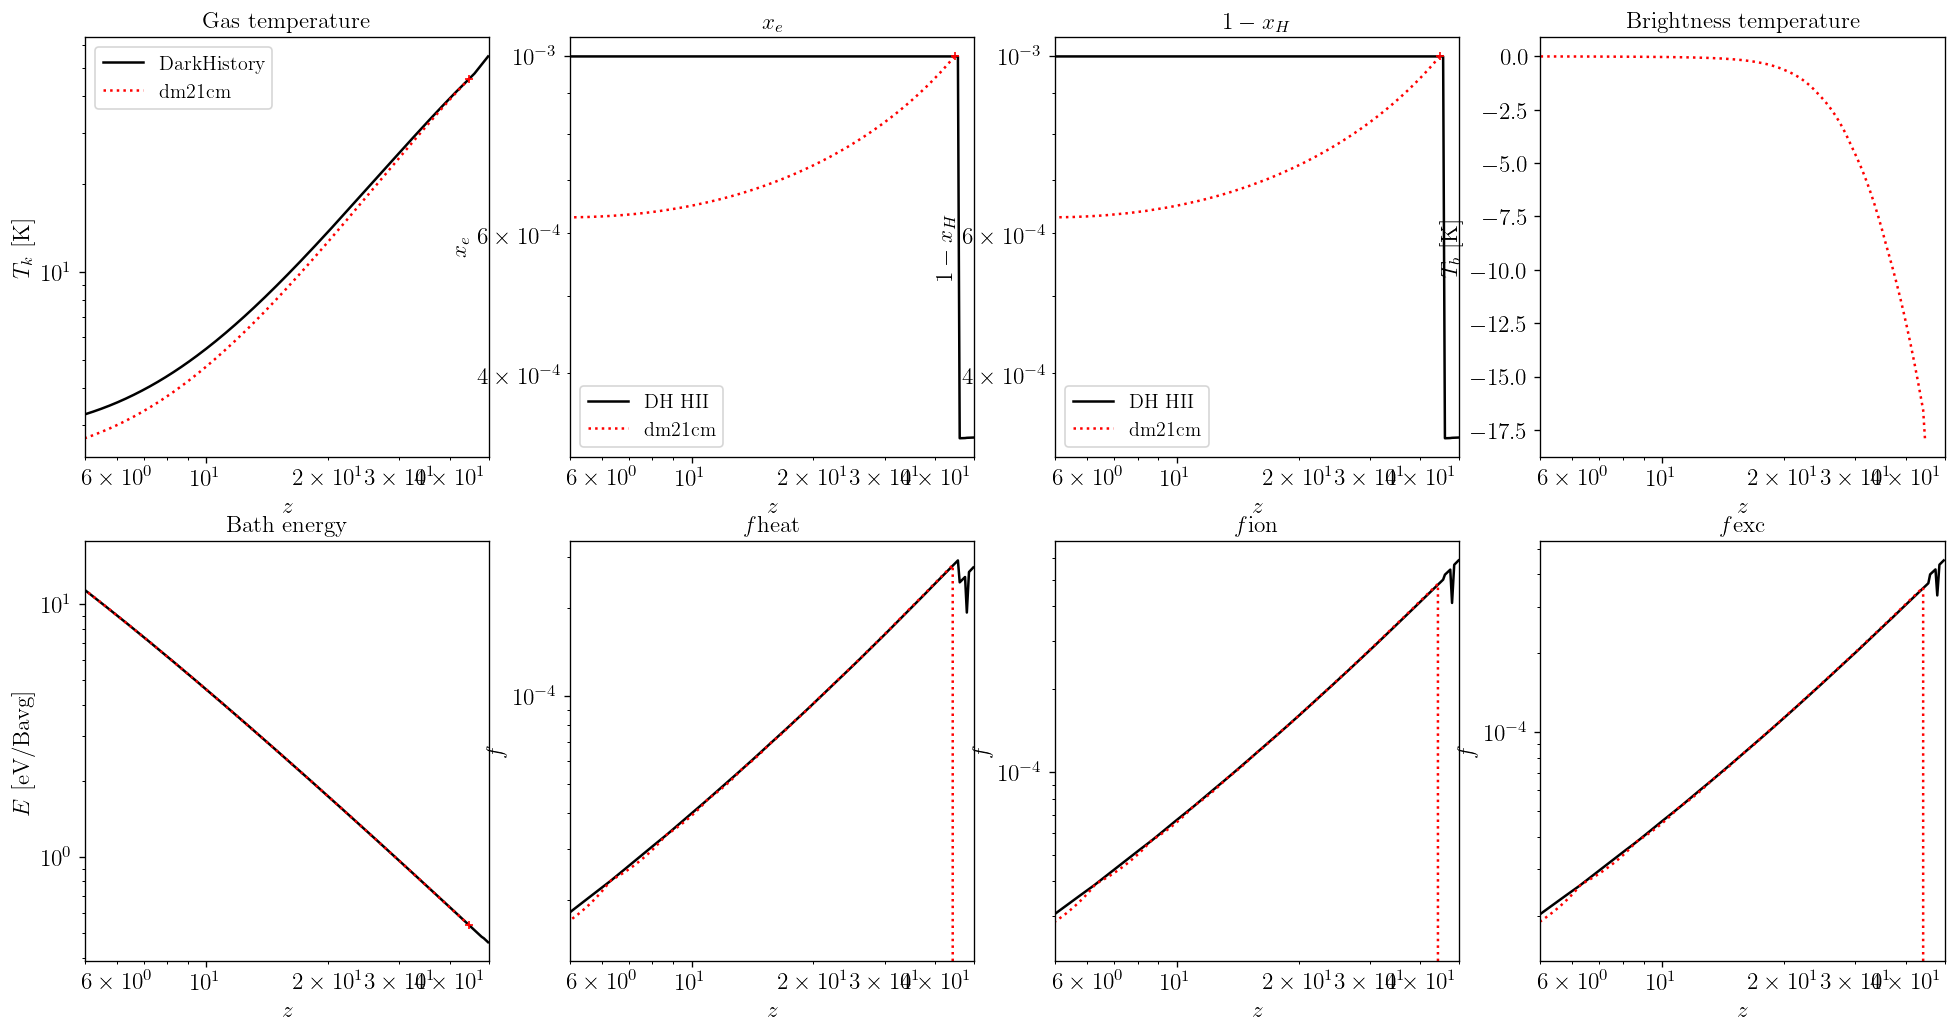

In [9]:
run_name = 'dhc_phph'
dh_soln = pickle.load(open(f"run_info/{run_name}_dh_soln.p", 'rb'))
run_name = 'dhc_phph'
soln = np.load(f"run_info/{run_name}_records.npy", allow_pickle=True).item()
plot_global(dh_soln, soln)

In [10]:
from dm21cm.utils import load_h5_dict
abscs = load_h5_dict(f"../data/abscissas/abscs_{tf_version}.h5")

In [11]:
abscs.keys()

dict_keys(['dep_c', 'dlnz', 'elecEk', 'nBs', 'photE', 'rs', 'x'])

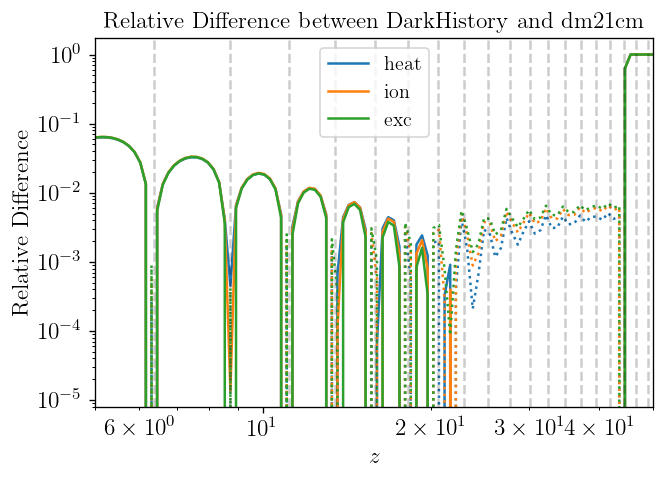

In [12]:
diffs = {}
for k in ['heat', 'ion', 'exc']:
    if k == 'ion':
        dh_fs = dh_soln['f']['low']['H ion'] + dh_soln['f']['high']['H ion'] + dh_soln['f']['low']['He ion'] + dh_soln['f']['high']['He ion']
    else:
        dh_fs = dh_soln['f']['low'][k] + dh_soln['f']['high'][k]
    interp_dh = interpolate.interp1d(dh_soln['rs'] - 1, dh_fs, bounds_error=False, fill_value=0.)
    interp_dm21 = interpolate.interp1d(soln['z'], soln[f'f_{k}'], bounds_error=False, fill_value=0.)

    common_x = np.geomspace(5, 50, 100)  # you can adjust the number of points
    common_dh = interp_dh(common_x)
    common_dm21 = interp_dm21(common_x)
    diffs.update({k : (common_dh - common_dm21) / common_dh})

fig, ax = plt.subplots()
for i, k in enumerate(diffs):
    ax.plot(common_x, diffs[k], label=k, color=f'C{i}')
    ax.plot(common_x, -diffs[k], ls=':', color=f'C{i}')
for rs in abscs['rs']:
    ax.axvline(rs-1, ls='--', color='k', alpha=0.2)
ax.set(xlim=(5, 50), xscale='log', yscale='log')  # adjust scales as needed
ax.set(xlabel='$z$', ylabel='Relative Difference', title='Relative Difference between DarkHistory and dm21cm')
ax.legend()

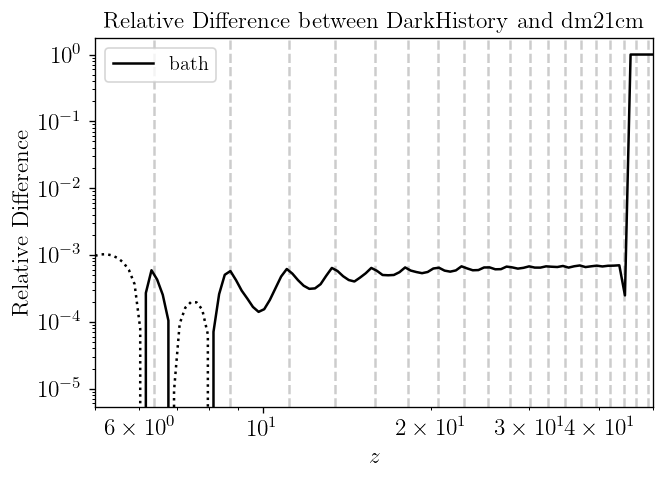

In [13]:
interp_dh = interpolate.interp1d(dh_soln['rs'] - 1, [s.toteng() for s in dh_soln['highengphot']], bounds_error=False, fill_value=0.)
interp_dm21 = interpolate.interp1d(soln['z'], soln['E_phot'], bounds_error=False, fill_value=0.)

common_x = np.geomspace(5, 50, 100)  # you can adjust the number of points
common_dh = interp_dh(common_x)
common_dm21 = interp_dm21(common_x)
diff = (common_dh - common_dm21) / common_dh

fig, ax = plt.subplots()
ax.plot(common_x, diff, label='bath', color=f'k')
ax.plot(common_x, -diff, ls=':', color=f'k')
for rs in abscs['rs']:
    ax.axvline(rs-1, ls='--', color='k', alpha=0.2)
ax.set(xlim=(5, 50), xscale='log', yscale='log')  # adjust scales as needed
ax.set(xlabel='$z$', ylabel='Relative Difference', title='Relative Difference between DarkHistory and dm21cm')
ax.legend()

In [18]:
dh_soln.keys()

dict_keys(['rs', 'x', 'Tm', 'highengphot', 'lowengphot', 'lowengelec', 'f'])

In [ ]:
zs = np.linspace(5.001, 44.999, 100)
dh_fs = dh_soln['f']['low']['heat'] + dh_soln['f']['high']['heat']
dh_arr = np.interp(1+zs, dh_soln['rs'][::-1], dh_fs[::-1])
p21c_arr = np.interp(zs, soln['z'][::-1], soln['f_heat'][::-1])
(np.abs(p21c_arr-dh_arr)/dh_arr)

In [ ]:
zs = np.linspace(5.001, 44.999, 100)
dh_bath_engs = [s.toteng() for s in dh_soln['highengphot']]
dh_arr = np.interp(1+zs, dh_soln['rs'][::-1], dh_bath_engs[::-1])
p21c_arr = np.interp(zs, soln['z'][::-1], soln['E_phot'][::-1])
np.max(np.abs(p21c_arr-dh_arr)/dh_arr)

0.05427165381579362

In [ ]:
plt.plot(zs, p21c_arr)
plt.plot(zs, dh_arr)